In [4]:
#Import Libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from joblib import dump

In [5]:
#Load the Dataset
base_df = pd.read_csv('Fish.csv')
base_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
#Data Cleaning 1: Detects and handles missing data
df = base_df.dropna(how='any')

le = LabelEncoder()
label = le.fit_transform(df['Species'])

df.drop("Species", axis=1, inplace=True)

df["Species"] = label

label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5])

In [7]:
#Split training and validation datasets
#Define x and y variable
x = df.drop(['Species'],axis=1).to_numpy()
y = df['Species'].to_numpy()

#Create Train and Test Datasets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#Scale the Data
sc = StandardScaler()
x_train_2 = sc.fit_transform(x_train)
x_test_2 = sc.transform(x_test)

**Multiple Linear Regression Model**

In [8]:
# Train Multiple Linear Regression model
mlr_model = LinearRegression()
mlr_model.fit(x_train, y_train)

# Make predictions on validation dataset
y_pred_mlr = mlr_model.predict(x_test)

# Evaluate the model
print('Multiple Linear Regression:')
print('R-squared:', r2_score(y_test, y_pred_mlr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_mlr)))

# Save the models
dump(mlr_model, 'mlr_model.joblib')

Multiple Linear Regression:
R-squared: 0.5682035669605455
Root Mean Squared Error: 1.3607278245039105


['mlr_model.joblib']

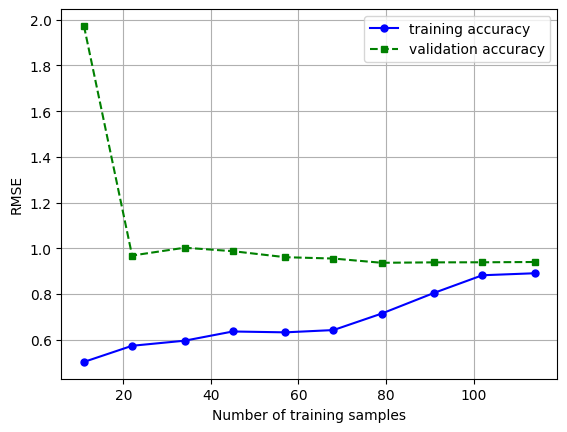

In [9]:
def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train,
                                                            y=y_train,
                                                            train_sizes=np.linspace(.1,1,10),
                                                            scoring = 'neg_mean_squared_error',
                                                            cv=10,random_state=100)

    train_mean = np.sqrt(np.mean(-train_scores, axis=1))
    test_mean = np.sqrt(np.mean(-test_scores, axis=1))

    plt.plot(train_sizes, train_mean,color='blue', marker='o',
             markersize=5, label='training accuracy')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('RMSE')
    plt.legend(loc='best')
    plt.show()

plot_learning_curves(mlr_model)

In [10]:
le.inverse_transform([0,1,2,3,4,5])

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt'], dtype=object)

In [11]:
import pickle
# save
with open('model.pkl','wb') as f:
    pickle.dump(mlr_model,f)